In [54]:
import datetime
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
from WindPy import w
import os
%matplotlib inline

In [55]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

# 定义常量

In [56]:
risk_free = 0.015 # 1年期定期存款利率

In [57]:
def sharpe_ratio(an_ret, an_vol, risk_free):
    return (an_ret - risk_free) / an_vol

In [58]:
today = datetime.datetime.today()

In [59]:
# if datetime.date.weekday(today) == 4:
#     next_date = today + datetime.timedelta(3)
# else:
#     next_date = today + datetime.timedelta(1)
next_date = today # 在jupyter中生成的是当日的数据

In [60]:
next_date.strftime("%Y-%m-%d")

'2019-11-27'

In [61]:
DIR = u'D:/Data/江苏银行/%s'%(next_date.strftime('%Y%m%d'))
if not os.path.exists(DIR):
    os.mkdir(DIR)

In [62]:
# SDIR = u'\\\\hfm-pubshare\HFM各部门共享\Harvest嘉实全体员工\策略孵化组\多重风管分组审核\zhangyang\江苏银行全球购策略\数据'
# if not os.path.exists(SDIR):
#     os.mkdir(SDIR)

#### 组合代码

In [63]:
PORTFOLIO_CODE = 'JSJJ01'

#### 组合名称

In [64]:
PORTFOLIO_NAME = u'嘉实一键买全球策略'

#### 基金公司对应TA代码

In [65]:
COMP2TA = {u'嘉实基金': '07',
           u'华夏基金': '03',
           u'博时基金': '05',
           u'鹏华基金': '06'}

#### 基金产品列表

In [66]:
# FUNDS = ['070037.OF', '160706.OF', '000008.OF', '070023.OF', '160716.OF', '000342.OF', '000341.OF', '000071.OF', '050025.OF', '000290.OF']
# FUNDS = ['070002.OF', '070009.OF', '070012.OF', '070025.OF', '070026.OF'] # 测试1
# FUNDS = ['070002.OF', '070012.OF', '070025.OF', '070026.OF', '070008.OF'] # 测试2
FUNDS = ['070037.OF', '160706.OF', '000008.OF', '000071.OF', '050025.OF'] # 测试3

#### 基金产品类型

In [67]:
# FUND_TYPES = [2, 1, 1, 1, 1, 7, 7, 7, 7, 7]
# FUND_TYPES = [1, 2, 7, 2, 2] # 测试1
# FUND_TYPES = [1, 1, 7, 2, 2, 2] # 测试2
FUND_TYPES = [2, 1, 1, 7, 7] # 测试3

#### 基金公司名称

In [68]:
# COMPS = [u'嘉实基金'] * 7 + [u'华夏基金', u'博时基金', u'鹏华基金']
# COMPS = [u'嘉实基金'] * 5 # 测试1
# COMPS = [u'嘉实基金'] * 5 # 测试2
COMPS = [u'嘉实基金'] * 3 +  [u'华夏基金', u'博时基金'] # 测试3

#### 基金产品名称

In [69]:
FUND_NAMES = [w.wss(code, 'name_official').Data[0][0] for code in FUNDS]

In [70]:
for name in FUND_NAMES:
    print name

嘉实纯债债券A
嘉实沪深300指数(LOF)
嘉实中证500ETF联接基金
华夏恒生ETF联接
博时标普500ETF联接(QDII)


# 生成组合产品池文件

In [71]:
lines = []
for i, code in enumerate(FUNDS):
    line = '|'.join([COMP2TA[COMPS[i]], COMPS[i], code.rstrip('.OF'), FUND_NAMES[i], str(FUND_TYPES[i])])
    lines.append(line)

In [72]:
fname = u'%s/COMB_PRD_00JSCL_%s.TXT'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('\n'.join(lines).encode('GBK'))
fname = u'%s/COMB_PRD_00JSCL_%s.TXT.OK'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('')

In [73]:
# fname = u'%s/COMB_PRD_00JSCL_%s.TXT'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('\n'.join(lines).encode('GBK'))
# fname = u'%s/COMB_PRD_00JSCL_%s.TXT.OK'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('')

# 生成组合信息文件

In [74]:
# wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet2')
# wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet1') # 测试1
# wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet3') # 测试2
wdf = pd.read_excel(u'../data/产品历史占比.xlsx', skiprows=1, index_col=0, sheet_name='Sheet4') # 测试3

In [75]:
wdf = wdf[wdf.index >= '2016-11-18'].dropna() # 最近一年

In [76]:
wdf.tail()

,070037,160706,000008,000071,050025
2019-11-15,0.2,0.175439,0.175439,0.224561,0.224561
2019-11-18,0.2,0.175439,0.175439,0.224561,0.224561
2019-11-19,0.2,0.175439,0.175439,0.224561,0.224561
2019-11-20,0.2,0.175439,0.175439,0.224561,0.224561
2019-11-21,0.2,0.175439,0.175439,0.224561,0.224561


In [77]:
elements = []
elements.append(PORTFOLIO_CODE)                                             # 组合编号
elements.append(PORTFOLIO_NAME)                                             # 组合名称
elements.append(','.join([COMP2TA[c] for c in COMPS]))                      # TA代码
elements.append(','.join(COMPS))                                            # TA名称
elements.append(','.join([code.rstrip('.OF') for code in FUNDS]))           # 产品代码
elements.append(','.join(FUND_NAMES))                                       # 产品名称
elements.append(','.join([str(0)] * len(FUNDS)))                            # 产品属性
elements.append(','.join(['%.8f'%(weight) for weight in wdf.iloc[-1]]))     # 产品占比
elements.append('720-1800')                                                 # 投资期限
elements.append('4')                                                        # 风险承受能力
elements.append(today.strftime('%Y%m%d'))                                   # 组合调整日期
elements.append(' ')                                                        # 组合调整说明
elements.append(' ')                                                        # 投资金额
elements.append(' ')                                                        # 策略方生效日期
elements.append(' ')                                                        # 年龄
elements.append('000001')                                                   # 策略维度类别
elements.append(' ')                                                        # 组合区间信息传
elements.append(' ')                                                        # 置信区间
elements.append(' ')                                                        # 组合穿透产品底层后真实资产类型
elements.append(' ')                                                        # 组合穿透产品底层后真实资产类型占比
elements.append(' ')                                                        # 组合管理人代码
elements.append(' ')                                                        # 组合管理人名称
elements.append(' ')                                                        # 策略方案
elements.append(' ')                                                        # 策略类型代码
elements.append(' ')                                                        # 策略类型名称
elements.append(' ')                                                        # 组合策略描述
elements.append(' ')                                                        # 组合风险描述
elements.append(' ')                                                        # 备用字段12
elements.append(' ')                                                        # 备用字段13

In [78]:
fname = u'%s/COMB_INFOR_00JSCL_%s.TXT'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('|'.join(elements).encode('GBK'))
fname = u'%s/COMB_INFOR_00JSCL_%s.TXT.OK'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('')

In [79]:
# fname = u'%s/COMB_INFOR_00JSCL_%s.TXT'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('|'.join(elements).encode('GBK'))
# fname = u'%s/COMB_INFOR_00JSCL_%s.TXT.OK'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('')

In [80]:
import matplotlib
matplotlib.matplotlib_fname() #将会获得matplotlib包所在文件夹

'C:\\Users\\zhangyang01\\AppData\\Local\\Continuum\\anaconda2\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

# 生成组合行情文件

## 获取基金历史行情

In [81]:
start_date, end_date = wdf.index[0], today - datetime.timedelta(1)

In [107]:
data = w.wsd(FUNDS, 'nav_adj', start_date, end_date)

In [108]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)
df.index = pd.to_datetime(df.index)

In [109]:
rdf = df.pct_change()

In [110]:
df.tail()

,070037.OF,160706.OF,000008.OF,000071.OF,050025.OF
2019-11-20,1.327636,4.336905,1.409394,1.5014,2.584266
2019-11-21,1.328785,4.317408,1.408973,1.4819,2.583951
2019-11-22,1.328785,4.275354,1.397618,1.4912,2.592139
2019-11-25,1.328785,4.304791,1.396882,1.5133,2.613553
2019-11-26,1.329933,4.318937,1.391941,1.5084,2.613553


In [111]:
wdf.columns = rdf.columns

In [112]:
if rdf.shape[0] > wdf.shape[0]: # 补充完整
    print('Append')
    app_df = pd.DataFrame(np.nan, columns=wdf.columns, index=rdf[rdf.index > wdf.index[-1]].index)
    wdf = wdf.append(app_df)
    wdf = wdf.fillna(method='ffill')
elif rdf.shape[0] < wdf.shape[0]:
    print('Cut')
    wdf = wdf.loc[rdf.index]

In [113]:
assert(rdf.shape == wdf.shape)

## 测算组合收益率

In [114]:
portfolio_ret = (wdf * rdf).sum(axis=1)

In [115]:
portfolio_ret.tail()

2019-11-20   -0.004517
2019-11-21   -0.003612
2019-11-22   -0.001002
2019-11-25    0.006299
2019-11-26   -0.000598
dtype: float64

In [116]:
last_year = end_date - datetime.timedelta(365)

In [117]:
one_year_ret = portfolio_ret[portfolio_ret.index >= last_year]

In [118]:
df = pd.DataFrame({u'最近一年': (1 + one_year_ret).cumprod() - 1})

In [119]:
df.to_excel(u'D:/tmp/组合最近一年收益率.xlsx')

## 业绩基准

In [120]:
bench_index = '000300.SH,HSI.HI,SPX.GI,H11001.CSI'
data = w.wsd(bench_index, 'pct_chg', portfolio_ret.index[0], portfolio_ret.index[-1])

In [121]:
bench = pd.DataFrame(np.array(data.Data).T / 100, index=data.Times, columns=bench_index.split(','))

In [122]:
bench = bench.fillna(0)

In [123]:
bench_ret = bench['000300.SH'] * 0.3 + bench['HSI.HI'] * 0.3 + bench['SPX.GI'] * 0.3 + bench['H11001.CSI'] * 0.1

In [124]:
total_invest = 10000
mu, sigma = empyrical.annual_return(portfolio_ret), empyrical.annual_volatility(portfolio_ret)
rho = 1.65
confidence = u'投资%d元，持有一年，模拟历史收益：%d元，90%%的概率下亏损不超过%d元'%\
            (total_invest, mu * total_invest, abs((mu - sigma) * rho * total_invest))

In [125]:
elements = []
elements.append(today.strftime("%Y%m%d"))                                                      # 发布日期
elements.append(PORTFOLIO_CODE)                                                                # 组合编号
elements.append(PORTFOLIO_NAME)                                                                # 组合名称
elements.append('%.8f'%(empyrical.annual_return(portfolio_ret)))                               # 组合年化收益率
elements.append('%.8f'%(empyrical.annual_volatility(portfolio_ret)))                           # 组合年化波动率
elements.append('%.8f'%(-empyrical.max_drawdown(portfolio_ret)))                               # 组合最大回撤率
elements.append('%.8f'%(sharpe_ratio(empyrical.annual_return(portfolio_ret), \
                                     empyrical.annual_volatility(portfolio_ret), risk_free)))  # 夏普比率
elements.append('%.8f'%(empyrical.cum_returns_final(bench_ret)))                               # 组合业绩基准收益率
elements.append('%.8f'%(1 + empyrical.cum_returns_final(portfolio_ret)))                       # 组合净值
elements.append('%.8f'%(1 + empyrical.cum_returns_final(portfolio_ret)))                       # 组合累计净值
elements.append(' ')                                                                           # 组合规模
elements.append('%.8f'%(portfolio_ret[-1]))                                                    # 组合日涨幅
elements.append('%.8f'%(empyrical.cum_returns_final(portfolio_ret)))                           # 组合累计收益率
elements.append('%.8f'%(empyrical.cum_returns_final(bench_ret)))                               # 业绩基准累计收益率
elements.append('%s'%(confidence))                                                             # 置信区间
elements.append('0,b')                                                                         # 业绩基准指数类型
elements.append('0.9,0.1')                                                                     # 业绩基准指数类型占比
elements.append(' ')                                                                           # 备用字段2
elements.append(' ')                                                                           # 备用字段3
elements.append(' ')                                                                           # 备用字段4
elements.append(' ')                                                                           # 备用字段5
elements.append('')                                                                            # 结束符

In [126]:
bench_ret[0] = 0

In [127]:
fname = u'%s/COMB_MARKET_00JSCL_%s.TXT'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('|'.join(elements).encode('GBK'))
fname = u'%s/COMB_MARKET_00JSCL_%s.TXT.OK'%(DIR, next_date.strftime('%Y%m%d'))
with open(fname, 'w') as f:
    f.write('')

In [128]:
# fname = u'%s/COMB_MARKET_00JSCL_%s.TXT'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('|'.join(elements).encode('GBK'))
# fname = u'%s/COMB_MARKET_00JSCL_%s.TXT.OK'%(SDIR, next_date.strftime('%Y%m%d'))
# with open(fname, 'w') as f:
#     f.write('')

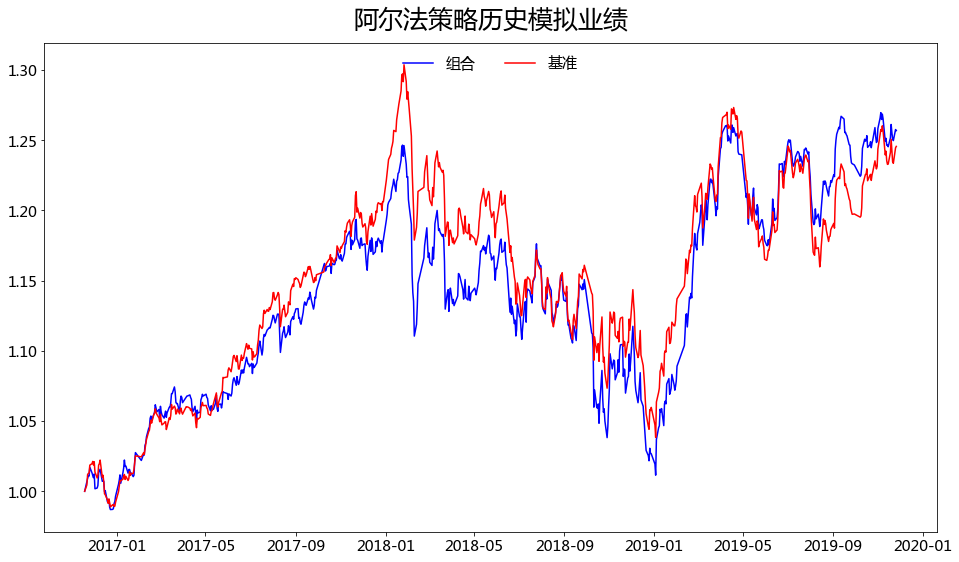

In [129]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1 + portfolio_ret).cumprod(), color='blue', label=u'组合')
lns2 = ax.plot((1 + bench_ret).cumprod(), color='red', label=u'基准')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.0))

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title(u'阿尔法策略历史模拟业绩', fontsize=25, y=1.02)

In [130]:
odf = pd.DataFrame({u'组合': ((1 + portfolio_ret).cumprod() - 1),
                    u'基准': ((1 + bench_ret).cumprod() - 1)})

In [131]:
odf.to_excel(u'../data/组合历史收益率.xlsx')